In [1]:
# import standard libraries
from autograd import numpy as np
from autograd import grad
from autograd.misc.optimizers import adam, sgd
from autograd import scipy as sp
import autograd.numpy.random as npr
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys
import time

# import our libraries
import bayes_helpers as bh
from utils import generate_data, run_toy_nn
from feed_forward import Feedforward
from nlm import NLM
from luna import LUNA
from config import *

### Define LUNA Hyperparameters

### Generate Cubic Dataset

Generates 100 datapoints for train and 100 points for test according to the function

$$y = \frac{1}{2}x^3 + \epsilon$$

$$\epsilon \sim N(0, 3^2)$$

In [2]:
# list to track runtimes
times = []

# list of index percentages to test:
percs = [0.01, 0.1, 0.2, 0.4, 0.6, 0.8]

# set max_iteration to 3500
opt_params['max_iteration'] = real_max_iteration

# initialize train and validation data
x_train, y_train, x_test = generate_data(training_seed)
x_valid, y_valid, _ = generate_data(valid_seed)

In [3]:
#JACK
# Edit grad_func_specs dictionary for fixed step sizes

grad_func_specs_80 = {'random' : 0.8}
grad_func_specs_60 = {'random' : 0.6} 
grad_func_specs_40 = {'random' : 0.4}
grad_func_specs_20 = {'random' : 0.2}
grad_func_specs_10 = {'random' : 0.1}
grad_func_specs_1 = {'random' : 0.01} 


In [4]:
opt_params

{'step_size': 0.001,
 'max_iteration': 3500,
 'random_restarts': 1,
 'optimizer': 'adam'}

### Train LUNA

`luna_80percent` uses 80 % of indices for sampling

`luna_60percent` uses 60 % of indices for sampling

`luna_40percent` uses 40 % of indices for sampling

`luna_20percent` uses 20 % of indices for sampling

`luna_10percent` uses 10 % of indices for sampling

`luna_1percent` uses  1 % of indices for sampling

#### LUNA 80% of indices sampled

In [5]:
t0 = time.time()
luna_80percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_80)
luna_80percent.train(x_train, y_train, opt_params)
times.append(np.round(time.time() - t0, 3))
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 3400 lower bound -5588.709062666859; gradient mag: 461.118028770167726
Done Training
time: 2921.86 seconds


#### LUNA 60% of indices sampled

In [6]:
t0 = time.time()
luna_60percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_60)
luna_60percent.train(x_train, y_train, opt_params)
times.append(np.round(time.time() - t0, 3))
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 3400 lower bound -6443.384959618316; gradient mag: 123.269959547352236
Done Training
time: 2862.534 seconds


#### LUNA 40% of indices sampled

In [7]:
t0 = time.time()
luna_40percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_40)
luna_40percent.train(x_train, y_train, opt_params)
times.append(np.round(time.time() - t0, 3))
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 3400 lower bound -4220.278562518963; gradient mag: 270.960026034326823
Done Training
time: 2881.376 seconds


#### LUNA 20% of indices sampled

In [8]:
t0 = time.time()
luna_20percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_20)
luna_20percent.train(x_train, y_train, opt_params)
times.append(np.round(time.time() - t0, 3))
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 3400 lower bound -5610.3286802644325; gradient mag: 303.25387124922406
Done Training
time: 2882.896 seconds


In [9]:
#### LUNA 10% of indices sampled

In [10]:
t0 = time.time()
luna_10percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_10)
luna_10percent.train(x_train, y_train, opt_params)
times.append(np.round(time.time() - t0, 3))
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 3400 lower bound -5300.80615910636; gradient mag: 507.2983169780017047
Done Training
time: 2951.541 seconds


In [11]:
#### LUNA 1% of indices sampled

In [12]:
t0 = time.time()
luna_1percent = LUNA(prior_variance, y_noise_variance, regularization_param_luna, similarity_param, luna_architecture, 
            random_seed, grad_func_specs= grad_func_specs_1)
luna_1percent.train(x_train, y_train, opt_params)
times.append(np.round(time.time() - t0, 3))
print(f"time: {np.round(time.time() - t0, 3)} seconds")

 Iteration 3400 lower bound -5067.575411729897; gradient mag: 103.299955190134345
Done Training
time: 3009.353 seconds


In [13]:
LL_rand_index = []
for model in [luna_1percent, luna_10percent, luna_20percent, luna_40percent, luna_60percent, luna_80percent]:
    LL_rand_index.append(model.get_log_l(x_train,y_train,x_valid,y_valid))

In [14]:
print('log-likelihood for Sampling Analysis:\n')
print(f'log-likelihood for  1% random indices:  {LL_rand_index[0]}')
print(f'log-likelihood for 10% random indices:  {LL_rand_index[1]}')
print(f'log-likelihood for 20% random indices:  {LL_rand_index[2]}')
print(f'log-likelihood for 40% random indices:  {LL_rand_index[3]}')
print(f'log-likelihood for 60% random indices:  {LL_rand_index[4]}')
print(f'log-likelihood for 80% random indices:  {LL_rand_index[5]}')

log-likelihood for Sampling Analysis:

log-likelihood for  1% random indices:  -143.0396802074957
log-likelihood for 10% random indices:  -135.77955710085863
log-likelihood for 20% random indices:  -132.5767747361672
log-likelihood for 40% random indices:  -131.4964262952128
log-likelihood for 60% random indices:  -134.1246586098263
log-likelihood for 80% random indices:  -133.96293658992488


### Compare Results

- Not sure what to conclude.

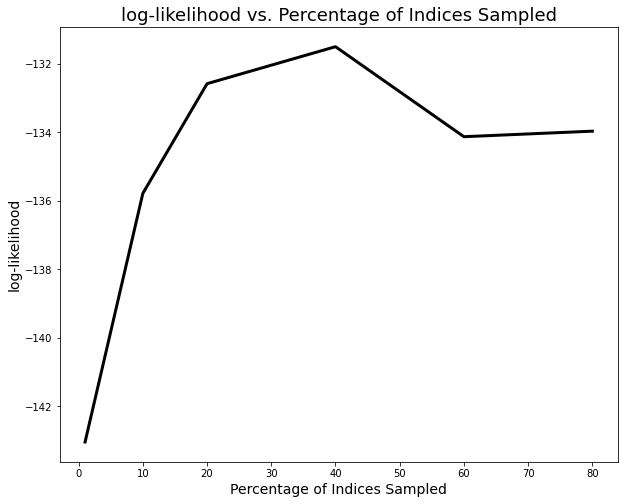

In [15]:
# xx == percentage of indices sampled
xx = [1,10,20,40,60,80]

fig, ax = plt.subplots(1,1,figsize = (10,8))
#ax = axes.flatten()
ax.plot(xx, LL_rand_index, 'black', lw='3', label='log-likelihood given indices sampled')
ax.set_xlabel('Percentage of Indices Sampled', fontsize = 14)
ax.set_ylabel('log-likelihood', fontsize = 14)
ax.set_title('log-likelihood vs. Percentage of Indices Sampled', fontsize = 18)
#ax.legend(fontsize=12);
fig.savefig(f"figs/LUNA_log_likelihood_sampling_analysis_{str(opt_params['max_iteration'])}_iterations.png")

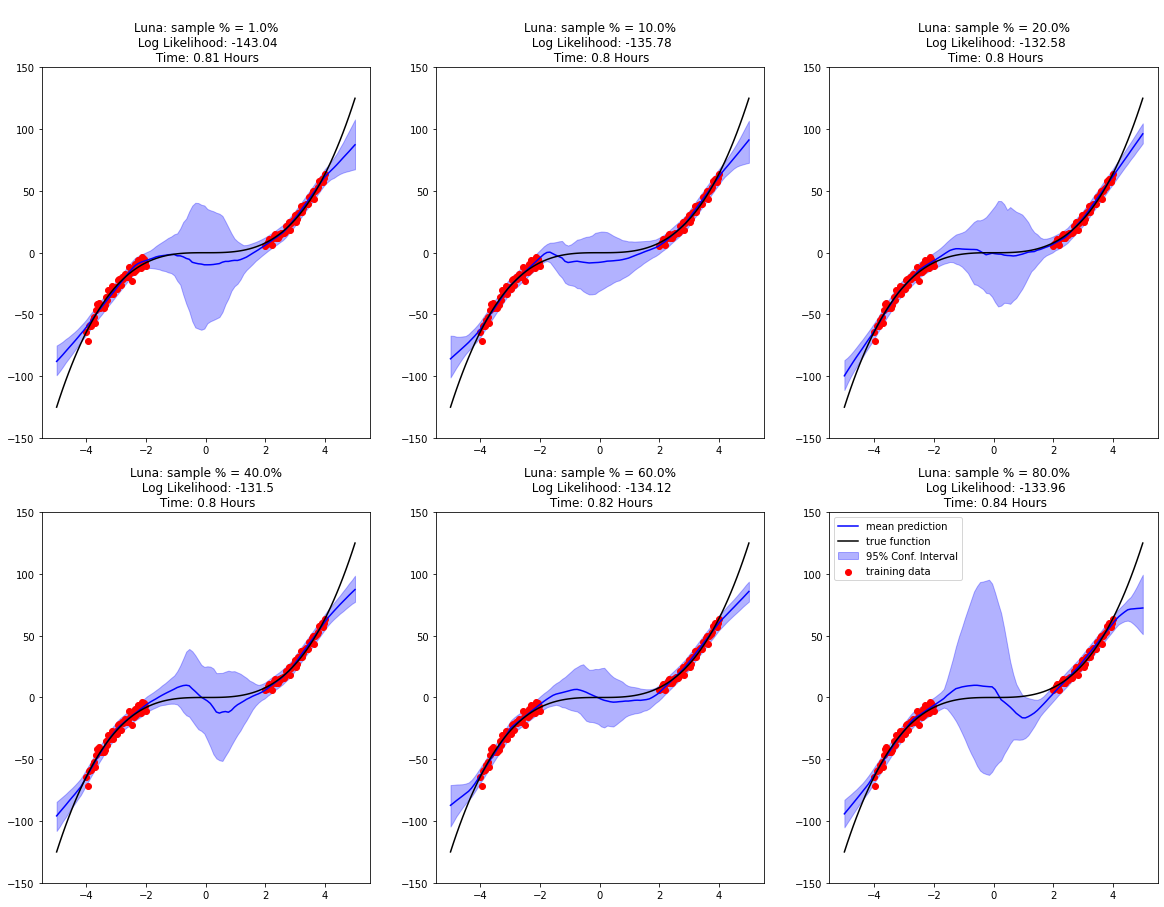

In [19]:
fig,ax = plt.subplots(2,3 ,figsize=(20,15))
i = 0
j = 0
k = 0
for model in [luna_1percent, luna_10percent, luna_20percent, luna_40percent, luna_60percent, luna_80percent]:
    predictives, predictive_samples = model.predict(x_test)
    log_l = model.get_log_l(x_train,y_train,x_valid,y_valid)
    name = f"\nLuna: sample % = {percs[i]*100}%" + f"\n Log Likelihood: {round(log_l,2)}" + f"\n Time: {round(times[i]/(60*60),2)} Hours"
    
    ax[j,k]=bh.viz_pp_samples(x_train, y_train,x_test.flatten(),predictive_samples,name, multi = ax[j,k])

    # ensure graphs are plotted in a logical order
    i +=1
    k += 1
    if i == 3:
        k = 0
        j = 1
        
plt.legend()
fig.savefig(f"figs/LUNA_sampling_analysis_{str(opt_params['max_iteration'])}_iterations.png")

In [17]:
opt_params

{'step_size': 0.001,
 'max_iteration': 3500,
 'random_restarts': 1,
 'optimizer': 'adam'}

In [18]:
times

[2921.86, 2862.534, 2881.376, 2882.896, 2951.541, 3009.352]